<a href="https://colab.research.google.com/github/ajayramaraju/Machine-Learning/blob/main/Best_regression_model_for_predicting_the_porosity_of_microstructure_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary modules first.
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [ ]:
image_dir = Path('/content/drive/MyDrive/microstructure_dataset')


**Preparing Data:**

In [ ]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath')

In [ ]:
filepaths

0      /content/drive/MyDrive/microstructure_dataset/...
1      /content/drive/MyDrive/microstructure_dataset/...
2      /content/drive/MyDrive/microstructure_dataset/...
3      /content/drive/MyDrive/microstructure_dataset/...
4      /content/drive/MyDrive/microstructure_dataset/...
                             ...                        
200    /content/drive/MyDrive/microstructure_dataset/...
201    /content/drive/MyDrive/microstructure_dataset/...
202    /content/drive/MyDrive/microstructure_dataset/...
203    /content/drive/MyDrive/microstructure_dataset/...
204    /content/drive/MyDrive/microstructure_dataset/...
Name: Filepath, Length: 205, dtype: object

In [ ]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
porosity = pd.Series(filepaths.apply(lambda x:(os.path.split(os.path.split(x)[0])[1])), name='porosity').astype(np.int)
images = pd.concat([filepaths, porosity], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
images

,Filepath,porosity
0,/content/drive/MyDrive/microstructure_dataset/...,35
1,/content/drive/MyDrive/microstructure_dataset/...,31
2,/content/drive/MyDrive/microstructure_dataset/...,20
3,/content/drive/MyDrive/microstructure_dataset/...,42
4,/content/drive/MyDrive/microstructure_dataset/...,42
...,...,...
200,/content/drive/MyDrive/microstructure_dataset/...,24
201,/content/drive/MyDrive/microstructure_dataset/...,23
202,/content/drive/MyDrive/microstructure_dataset/...,36
203,/content/drive/MyDrive/microstructure_dataset/...,22


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
image_df = images.sample(205, random_state=1).reset_index(drop=True)
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

**Loading Images:**

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split= 0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255

)

In [ ]:
train_df

,Filepath,porosity
124,/content/drive/MyDrive/microstructure_dataset/...,47
181,/content/drive/MyDrive/microstructure_dataset/...,25
154,/content/drive/MyDrive/microstructure_dataset/...,32
53,/content/drive/MyDrive/microstructure_dataset/...,41
94,/content/drive/MyDrive/microstructure_dataset/...,43
...,...,...
133,/content/drive/MyDrive/microstructure_dataset/...,22
137,/content/drive/MyDrive/microstructure_dataset/...,16
72,/content/drive/MyDrive/microstructure_dataset/...,37
140,/content/drive/MyDrive/microstructure_dataset/...,27


In [ ]:
  train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='porosity',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=10,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='porosity',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=10,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='porosity',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=10,
    shuffle=False
)

Found 115 validated image filenames.
Found 28 validated image filenames.
Found 62 validated image filenames.


**Ploting the images:**


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['filepaths'], df['porosity'] = filepaths, porosity
df.head(5)

,filepaths,porosity
0,/content/drive/MyDrive/microstructure_dataset/...,50
1,/content/drive/MyDrive/microstructure_dataset/...,50
2,/content/drive/MyDrive/microstructure_dataset/...,50
3,/content/drive/MyDrive/microstructure_dataset/...,50
4,/content/drive/MyDrive/microstructure_dataset/...,50


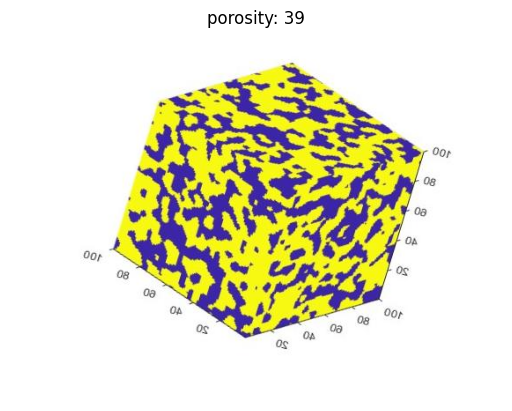

In [ ]:
from PIL import Image
rand_index = random.randint(0, len(filepaths))
porosity = df['porosity'][rand_index]
IMG = Image.open(df['filepaths'] [rand_index])
plt.title(f'porosity: {porosity}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='porosity', ylabel='Density'>

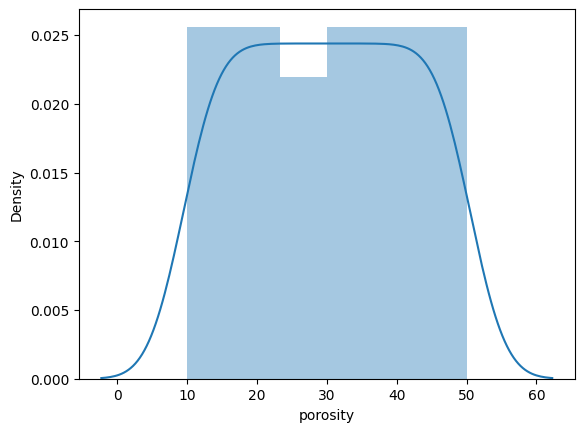

In [ ]:
 # porosity distribution
 sns.distplot(df['porosity'])

<Axes: ylabel='count'>

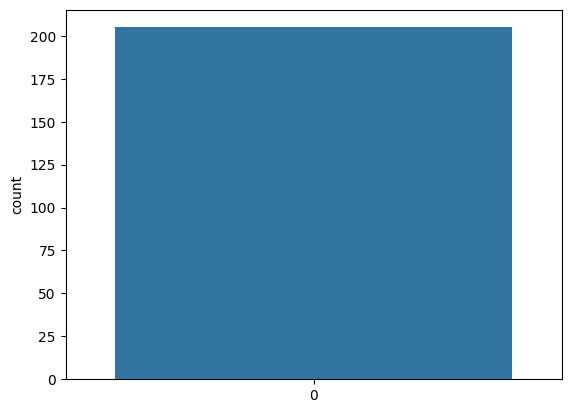

In [ ]:
sns.countplot(df['porosity'])

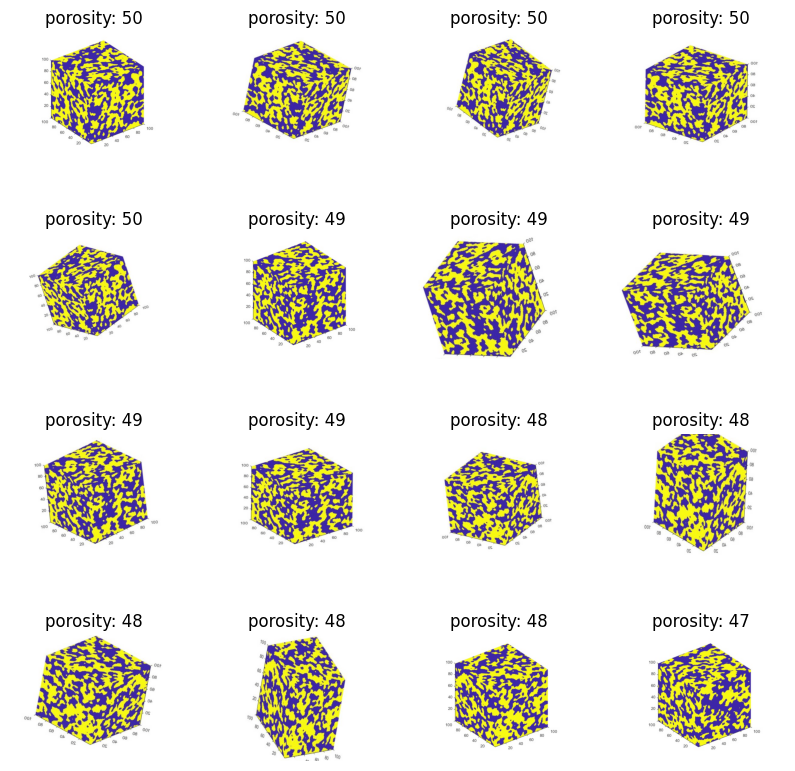

In [ ]:
plt.figure(figsize=(10, 10))
samples = df.iloc[0:16]

for index, sample, porosity in samples.itertuples():
    plt.subplot(4,4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'porosity: {porosity}')
    plt.imshow(img)

**Training:**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)

x = Dense(256, activation='relu')(x)
outputs = layers.Dense(1, name='porosity_output')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

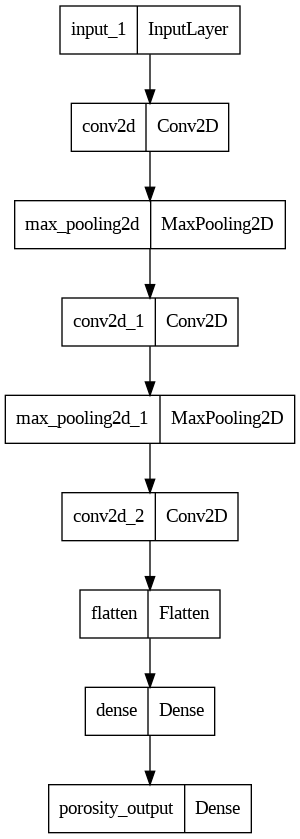

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from keras.api._v2.keras.callbacks import LearningRateScheduler

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

model.summary


Epoch 1/100
12/12 [==============================] - 49s 4s/step - loss: 491.9832 - val_loss: 147.2832
Epoch 2/100
12/12 [==============================] - 1s 53ms/step - loss: 224.8227 - val_loss: 160.3485
Epoch 3/100
12/12 [==============================] - 1s 81ms/step - loss: 158.1205 - val_loss: 107.9701
Epoch 4/100
12/12 [==============================] - 1s 70ms/step - loss: 153.3536 - val_loss: 142.0085
Epoch 5/100
12/12 [==============================] - 1s 79ms/step - loss: 136.2643 - val_loss: 93.8038
Epoch 6/100
12/12 [==============================] - 1s 109ms/step - loss: 122.1314 - val_loss: 79.0010
Epoch 7/100
12/12 [==============================] - 1s 94ms/step - loss: 101.2923 - val_loss: 75.8316
Epoch 8/100
12/12 [==============================] - 1s 59ms/step - loss: 116.5303 - val_loss: 57.0814
Epoch 9/100
12/12 [==============================] - 1s 54ms/step - loss: 96.4877 - val_loss: 48.6264
Epoch 10/100
12/12 [==============================] - 1s 52ms/step - l

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7d02fc3084c0>>

In [ ]:
predicted_porosity = np.squeeze(model.predict(test_images))
true_porosity = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_porosity, predicted_porosity)
print("Test R^2 Score: {:.5f}".format(r2))

7/7 [==============================] - 19s 3s/step
     Test RMSE: 5.34281
Test R^2 Score: 0.71629


In [ ]:
import cv2

In [ ]:
# Load the new image
new_image_path = '/content/drive/MyDrive/microstructure_dataset/37/37 (4).jpg'
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to the same dimensions as our model expects (e.g., 28x28 pixels)
new_image = cv2.resize(new_image, (28, 28))

# Normalize pixel values to the range [0, 1]
new_image = new_image / 255.0

# Reshape the image to match the input shape of our model
new_image = new_image.reshape(1, 28, 28, 1)

predicted_porosity = model.predict(new_image)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print ("43: ", predicted_porosity)

43:  [[36.501324]]


In [ ]:
print ("47: ", predicted_porosity)

47:  [[47.7025]]


In [ ]:
print ("37: ", predicted_porosity)

37:  [[34.80316]]
